In [1]:
import sys
sys.path.append("../py")
import transitTools
%pylab inline

/Users/engelen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
#signal team 0

In [3]:
signalcurve = loadtxt('../data/signalcurve_0_0.txt')
Per = 4.3 # period in days
R_s = 1 # radius of sun in solar radius units
print signalcurve

[ 1.  1.  1. ...,  1.  1.  1.]


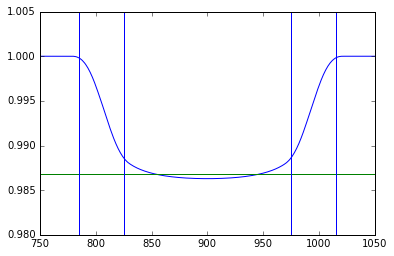

In [4]:
plot(signalcurve)
ylim([0.98,1.005])
xlim([750,1050])

mn=mean(signalcurve[825:975])
plot(mn*ones(1800))
axvline(825)
axvline(975)
axvline(785)
axvline(1015)

In [5]:
print min(signalcurve)

0.98628890778


In [6]:
depth1 = max(signalcurve)-min(signalcurve) # basic way of getting the depth
print depth1
depth2 = mean(signalcurve[825:975])

0.01371109222


In [7]:
#assume the star is similar to our sun
R_p = (depth1**0.5)*R_s # radius of the planet in solar radius units
print R_p 

0.117094373135


In [8]:
dur = 1015 - 785 # minutes
durd = dur/(24.*60)
a = R_s*Per/(pi*durd)
print dur, durd
print a

230 0.159722222222
8.56945571848


In [9]:
time = arange(1800)
a = ones(1800)
a[(time < 1300) & (time > 1100)] = .9

(0.8, 1.2)

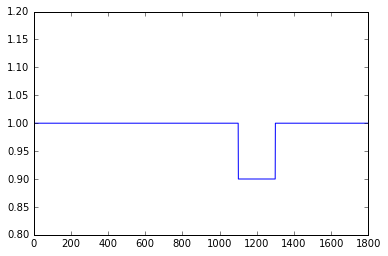

In [10]:
plot(a)
ylim([.8,1.2])

(750, 1050)

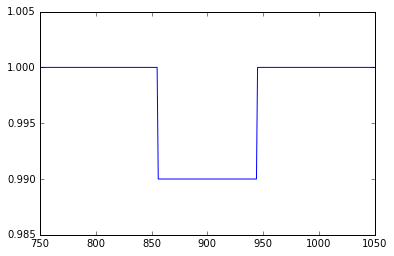

In [17]:
plot(transitTools.tophat_model(arange(1800),dur=2*45, depth = .987))
ylim([.985, 1.005])
xlim([750, 1050])

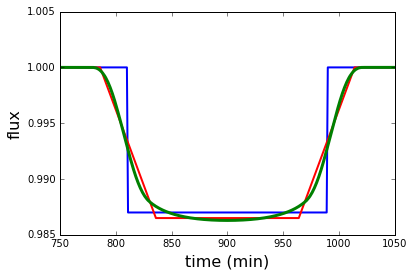

In [47]:
plot(transitTools.tophat_model(arange(1800),dur=2*90, depth = 1 - .987), 'b' , lw = 2)

plot(transitTools.trapezoid_model(arange(1800),dur=2*115,  inner_dur = 2*65, depth = 1 - .9865),'r', lw = 2)
plot(signalcurve, 'g', lw = 3)

ylim([.985, 1.005])
xlim([750, 1050])
xlabel('time (min)', fontsize = 16)
ylabel('flux', fontsize = 16)